In [1]:
import pydicom as dicom # Read the dicom files
import os
import pandas as pd

dir = '../DSB3/'
data_dir = os.path.join(dir, 'stage1')
paitents = os.listdir(data_dir)
labels_df = pd.read_csv(os.path.join(dir, 'stage1_labels.csv'), index_col=0)

labels_df.head()

,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [2]:
for paitent in paitents[:20]:
    label = labels_df._get_value(paitent, 'cancer')
    path = os.path.join(data_dir, paitent)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))

    print(len(slices), slices[0].pixel_array.shape)
    print(slices[0])

195 (512, 512)
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.321555830121981826540353244716
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 358
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.321555830121981826540353244716
(0008, 0060) Modality                       

In [3]:
len(paitents)

1595

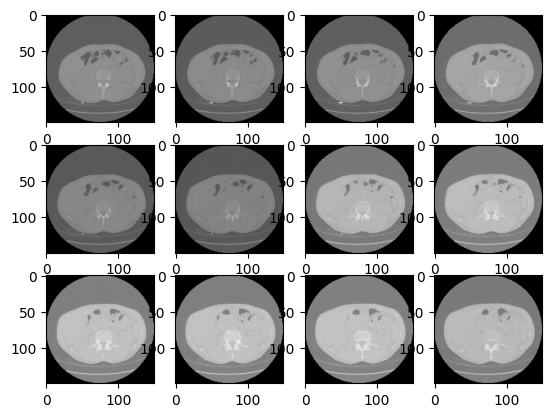

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

IMG_PX_SIZE = 150

for paitent in paitents[:1]:
    label = labels_df._get_value(paitent, 'cancer')
    path = os.path.join(data_dir, paitent)
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    fig = plt.figure()

    for num, each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3, 4, num + 1)
        new_image = cv2.resize(np.array(each_slice.pixel_array), (IMG_PX_SIZE, IMG_PX_SIZE))
        y.imshow(new_image, cmap='gray')
    plt.show()